# Bank Customer Churn Prediction
It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

# Tools preparation

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratry data analysis

In [92]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
df.shape

(10000, 14)

In [94]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [96]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

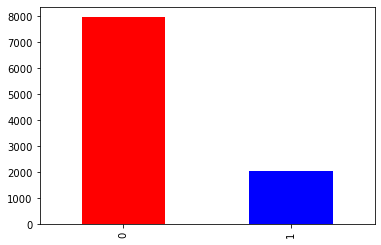

In [97]:
df["Exited"].value_counts().plot(kind="bar",color=["red","blue"]);

In [98]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [99]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [101]:
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [102]:
len(df)

10000

In [103]:
pd.crosstab(df.Exited,df.Gender)  # out f 4543,3404  female are leave and 5457 in 898 male are leave

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [104]:
3404/4543  #  female have more leave

0.7492846136913933

In [105]:
898/5457 # male have less

0.16455928165658787

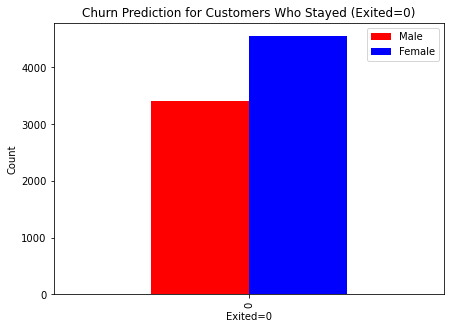

In [106]:
 #Create a cross-tabulation of 'Exited' and 'Gender' for customers who stayed (Exited=0)
exited_0_gender = pd.crosstab(df[df['Exited'] == 0].Exited, df[df['Exited'] == 0].Gender)
exited_0_gender.plot(kind="bar", figsize=(7, 5), color=["red", "blue"])
plt.title("Churn Prediction for Customers Who Stayed (Exited=0)")
plt.xlabel("Exited=0")
plt.ylabel("Count")
plt.legend(('Male', 'Female'))
plt.show()

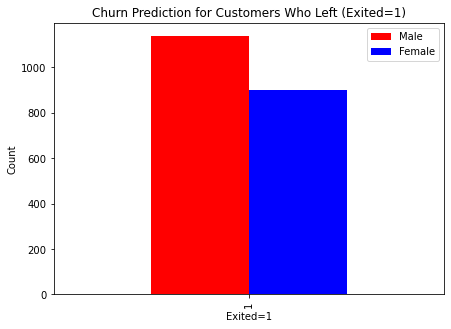

In [107]:
# Create a cross-tabulation of 'Exited' and 'Gender' for customers who left (Exited=1)
exited_1_gender = pd.crosstab(df[df['Exited'] == 1].Exited, df[df['Exited'] == 1].Gender)
exited_1_gender.plot(kind="bar", figsize=(7, 5), color=["red", "blue"])
plt.title("Churn Prediction for Customers Who Left (Exited=1)")
plt.xlabel("Exited=1")
plt.ylabel("Count")
plt.legend(('Male', 'Female'))
plt.show()


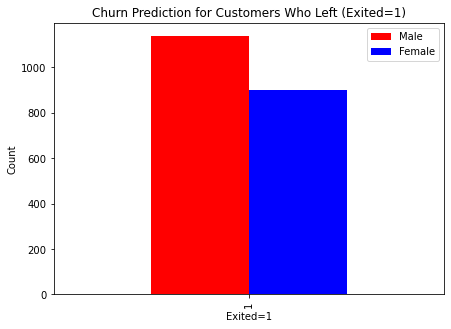

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame called 'df'

# Create a cross-tabulation of 'Exited' and 'Gender' for customers who left (Exited=1)
exited_1_gender = pd.crosstab(df[df['Exited'] == 1].Exited, df[df['Exited'] == 1].Gender)

# Plot the cross-tabulation as a bar chart
exited_1_gender.plot(kind="bar", figsize=(7, 5), color=["red", "blue"])
plt.title("Churn Prediction for Customers Who Left (Exited=1)")
plt.xlabel("Exited=1")
plt.ylabel("Count")
plt.legend(('Male', 'Female'))
plt.show()


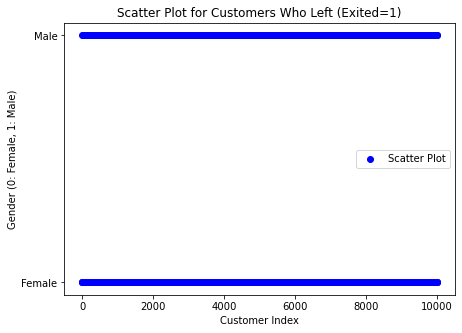

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame called 'df'

# Create a scatter plot of 'Exited' and 'Gender' for customers who left (Exited=1)
exited_1_gender = df[df['Exited'] == 1]  # Filter the DataFrame for customers who left
plt.figure(figsize=(7, 5))
plt.scatter(exited_1_gender.index, exited_1_gender['Gender'], color='blue', label='Scatter Plot')

# Customize the plot
plt.title("Scatter Plot for Customers Who Left (Exited=1)")
plt.xlabel("Customer Index")
plt.ylabel("Gender (0: Female, 1: Male)")
plt.legend()

# Show the scatter plot
plt.show()


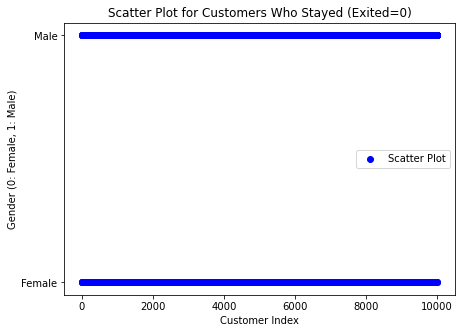

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame called 'df'

# Create a DataFrame for customers who stayed (Exited=0)
exited_0_gender = df[df['Exited'] == 0]

# Create a scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(exited_0_gender.index, exited_0_gender['Gender'], color='blue', label='Scatter Plot')

# Customize the plot
plt.title("Scatter Plot for Customers Who Stayed (Exited=0)")
plt.xlabel("Customer Index")
plt.ylabel("Gender (0: Female, 1: Male)")
plt.legend()

# Show the scatter plot
plt.show()


<AxesSubplot:ylabel='Frequency'>

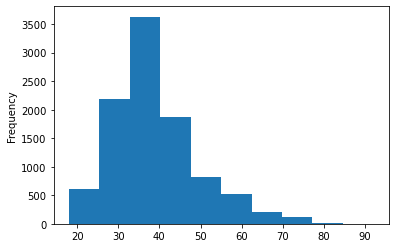

In [111]:
## to create age distrubtion of histogram
df.Age.plot.hist()

In [112]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [113]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [114]:
#Create a cross-tabulation of 'Exited' and 'Geograpy' for customers who stayed (Exited=0)
  #  value:1 #  of 'Exited' and 'Geograpy' for customers who left (Exited=1)
      

In [115]:
pd.crosstab(df.Geography,df.Exited) ## 1 show leave customer

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


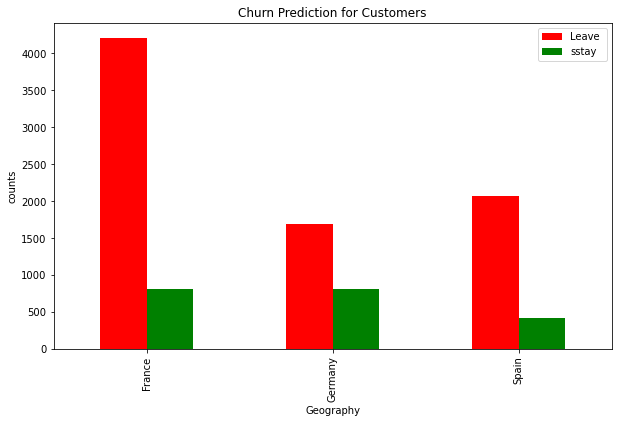

In [116]:
pd.crosstab(df.Geography,df.Exited).plot(kind="bar",figsize=(10,6),color=["red","green"])
#give same discription
plt.title("Churn Prediction for Customers")
plt.xlabel("Geography")
plt.ylabel("counts")
plt.legend(["Leave ","sstay"])

# correlation matrix

In [117]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


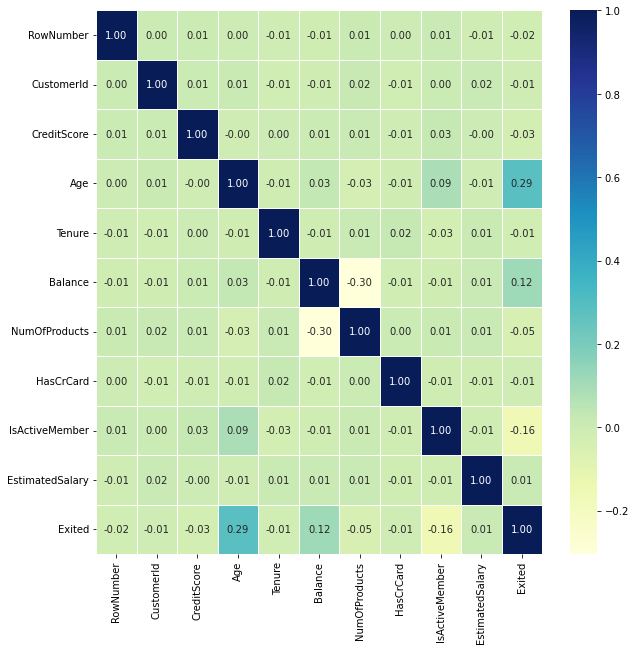

In [118]:
# lets draw corrolaton map
cor_map=df.corr()
home_row=plt.subplots(figsize=(10,10))
room=sns.heatmap(cor_map,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

In [119]:
## split into test and train
x=df.drop("Exited",axis=1)
y=df["Exited"]
np.random.seed(7)


In [120]:
from sklearn.model_selection import train_test_split

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [122]:
len(df)

10000

In [123]:
len(x_train)

7000

In [124]:
8000/10000

0.8

In [125]:
from sklearn.preprocessing import LabelEncoder
encode =  LabelEncoder()

In [126]:
df['Surname'] = encode.fit_transform(df['Surname'])
df['Geography'] = encode.fit_transform(df['Geography'])
df['Gender'] = encode.fit_transform(df['Gender'])
df['Balance'] = encode.fit_transform(df['Balance'])
df['EstimatedSalary'] = encode.fit_transform(df['EstimatedSalary'])

# now we choose model
#1: K Nearest Neighbors Classifier 2: Random forest Classifier # 3:Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [129]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0,1,1,1,5068,1
1,2,15647311,1177,608,2,0,41,1,743,1,0,1,5639,0
2,3,15619304,2040,502,0,0,42,8,5793,3,1,0,5707,1
3,4,15701354,289,699,0,0,39,1,0,2,0,0,4704,0
4,5,15737888,1822,850,2,0,43,2,3696,1,1,1,3925,0


In [130]:
df.dtypes

RowNumber          int64
CustomerId         int64
Surname            int32
CreditScore        int64
Geography          int32
Gender             int32
Age                int64
Tenure             int64
Balance            int64
NumOfProducts      int64
HasCrCard          int64
IsActiveMember     int64
EstimatedSalary    int64
Exited             int64
dtype: object

In [132]:
x = df.drop('Exited',axis=1)
y = df['Exited']


In [134]:
#split data into test train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [138]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()


In [139]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# step 3 fit the model

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [141]:
clf.fit(x_train,y_train)

RandomForestClassifier()

# step 4 evaluate

In [142]:
predicted_y=clf.predict(x_test)

In [143]:
predicted_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [144]:
clf.score(x_train,y_train)

1.0

In [145]:
clf.score(x_test,y_test)

0.867

# step 6 : we save model

In [147]:
import pickle
pickle.dump(clf,open("Churn_Modelling.Prediction","wb"))   ## wb mean write

In [148]:
load_model=pickle.load(open("Churn_Modelling.Prediction","rb"))

In [149]:
load_model.score(x_test,y_test)

0.867

# Conclusion

In [151]:
# We set 85% accuracy goal, but we did not meet
  # We can ask some Questions
    #What if we try to get more Data
    # What if we try to improve the quality of the Data
    # What if we try to use other models and see if there is any improvments